<img style="float: left;;" src='Figures/alinco.png' /></a>

# Modulo I: Preprocesamiento de Tweets para el Análisis de Sentimientos

## Configuración

Realizaremos un análisis de sentimientos de tweets usando el paquete [Kit de herramientas de lenguaje natural (NLTK)](http://www.nltk.org/howto/twitter.html), una biblioteca Python de código abierto para el procesamiento del lenguaje natural. 

Para este ejercicio, usaremos un conjunto de datos de Twitter que vienen con NLTK. Este conjunto de datos se ha anotado manualmente y sirve como base para desarrollar algunos modelos rápidamente. Vamos a importarlos ahora, así como algunas otras bibliotecas que usaremos.

In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

## Acerca del conjunto de datos de Twitter

El conjunto de datos de muestra de NLTK se divide en tweets positivos y negativos. Contiene 5000 tweets positivos y 5000 tweets negativos exactamente. La intención es tener un conjunto de datos equilibrado. Eso no refleja las distribuciones reales de clases positivas y negativas en la base de datos que tiene Twitter. Es solo porque los conjuntos de datos equilibrados simplifican el diseño de la mayoría de los métodos computacionales que se requieren para el análisis de sentimientos. 

Para descargar los datos hay que hacer lo siguiente:

In [2]:
nltk.download('twitter_samples')

Podemos cargar los campos de texto de los tweets positivos y negativos usando el método `strings ()` del módulo como este:

In [2]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')

In [3]:
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

A continuación, imprimiremos un informe con la cantidad de tweets positivos y negativos. También es fundamental conocer la estructura de datos de los conjuntos de datos

In [4]:
len(all_positive_tweets)

5000

In [5]:
len(all_negative_tweets)

5000


Podemos ver que los datos se almacenan en una lista y, como era de esperar, los tweets individuales se almacenan como cadenas.

Puede hacer un informe más atractivo visualmente utilizando la biblioteca [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html). Veamos cómo crear un [pie chart](https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) para mostrar la misma información que la anterior. 

[]

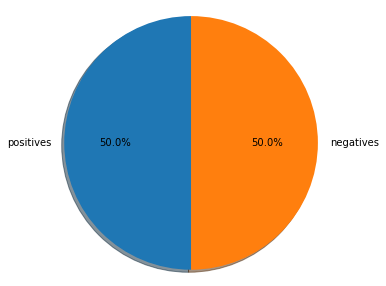

In [7]:
fig = plt.figure(figsize=(5,5))
labels = 'positives', 'negatives'
sizes=[len(all_positive_tweets), len(all_negative_tweets)]

plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.plot()


## Exploración de los textos



In [8]:
print('\033[92m'+all_positive_tweets[random.randint(0,5000)])
print('\033[91m'+all_negative_tweets[random.randint(0,5000)])


@spencerspellman thanks! ICeland was amazing! Crazy landscapes - hope you can get there soon! :)
@bbygjrlmgc oh :( i hate when that happens i get so sad over it too


Una observación que puede tener es la presencia de [emoticones](https://en.wikipedia.org/wiki/Emoticon) y URL en muchos de los tweets. Esta información será útil en los próximos pasos.

## Procesar previamente el texto para el análisis de sentimientos

El preprocesamiento de datos es uno de los pasos críticos en cualquier proyecto de aprendizaje automático. Incluye limpiar y formatear los datos antes de introducirlos en un algoritmo de aprendizaje automático. Para NLP, los pasos de preprocesamiento se componen de las siguientes tareas:

* Tokenizando la cadena
* Minúsculas
* Eliminación de stopwords
* Stemming,lematización



In [9]:
tweet = all_positive_tweets[2277]
print('\033[92m'+tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [10]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

### Eliminar hipervínculos, marcas y estilos de Twitter

Dado que tenemos un conjunto de datos de Twitter, nos gustaría eliminar algunas subcadenas de uso común en la plataforma, como el hashtag, las marcas de retweet y los hipervínculos. Usaremos la biblioteca [re](https://docs.python.org/3/library/re.html) para realizar operaciones de expresión regular en nuestro tweet. Definiremos nuestro patrón de búsqueda y usaremos el método `sub()` para eliminar coincidencias sustituyéndolo con un carácter vacío (es decir, `` '' ``)

In [11]:
print('\033[92m'+tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [12]:
# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '',tweet) 

In [14]:
print('\033[91m'+tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 


In [15]:
# remove hashtags
tweet2 = re.sub(r'#', '',tweet2) 

In [17]:
print('\033[91m'+tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [19]:
# remove old style retweet text "RT"
tweet2 = re.sub(r'RT[\s]+','', tweet2)

In [20]:
print('\033[91m'+tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenizar la cadena

Tokenizar significa dividir las cadenas en palabras individuales sin espacios en blanco ni tabulaciones. En este mismo paso, también convertiremos cada palabra de la cadena a minúsculas. El módulo [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) de NLTK nos permite hacer esto fácilmente:

In [21]:
tokenizer = TweetTokenizer(preserve_case = False, strip_handles = True, reduce_len= True)


In [22]:
tweet_tokens = tokenizer.tokenize(tweet2)

In [24]:
print(tweet_tokens)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Remover stopwords y signos de puntuación

El siguiente paso es eliminar los stopwords y signos de puntuación.

In [25]:
stopwords_english = stopwords.words('english')

In [28]:
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'


Es hora de limpiar nuestro tweet tokenizado!

In [30]:
print('\033[92m')
print(tweet_tokens)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [31]:
tweets_clean=[]

for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
        tweets_clean.append(word)
print('\033[94m')
print(tweets_clean)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']



Tenga en cuenta que las palabras **happy** y **sunny** en esta lista están escritas correctamente.

### Stemming

es el proceso de convertir una palabra a su forma más general, o raíz. Esto ayuda a reducir el tamaño de nuestro vocabulario.

Considerando las siguientes palabras: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
Todas estas palabras se derivan de su raíz común **aprender**. Sin embargo, en algunos casos, el proceso de derivación produce palabras que no tienen la ortografía correcta de la palabra raíz. Por ejemplo, **happi** y **sunni**. Por ejemplo, podemos observar el conjunto de palabras que componen las diferentes formas de `happy`:

 * **happ**y
 * **happi**ness
 * **happi**er

Podemos ver que el prefijo **happi** se usa más comúnmente. No podemos elegir **happ** porque es la raíz de palabras no relacionadas como **happen**.

 
NLTK tiene diferentes módulos para derivar y usaremos el módulo [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter)  que implementa el algoritmo [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). 

In [32]:
print('\033[92m')
print(tweets_clean)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [33]:
stemmer = PorterStemmer()

In [34]:
tweets_stem =[]

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

print('\033[94m')
print(tweets_stem)


['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [35]:
def preprocess_tweet(tweet):
    
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '',tweet) 
    # remove hashtags
    tweet = re.sub(r'#', '',tweet) 
    # remove old style retweet text "RT"
    tweet = re.sub(r'RT[\s]+','', tweet)
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w','', tweet)
    
    # Tokenize
    tokenizer = TweetTokenizer(preserve_case = False, strip_handles = True, reduce_len= True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    #remove stopwords
    tweets_clean=[]

    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
            
    return tweets_clean




Ahora tenemos un conjunto de palabras que podemos incorporar a la siguiente etapa de nuestro proyecto de aprendizaje automático.

## process_tweet()

Como se muestra arriba, el preprocesamiento consta de varios pasos antes de llegar a la lista final de palabras. Sin embargo, podemos  utilizar la función `process_tweet (tweet)` disponible en _utils.py_. 

Para obtener el mismo resultado que en las celdas de código anteriores, solo necesitará llamar a la función `process_tweet ()`. Hagámoslo en la siguiente celda.

In [38]:
tweet = all_positive_tweets[2287]

tweet_clean = preprocess_tweet(tweet)
print(tweet_clean)

['time', 'awww', 'conni', 'forget', 'checkout', 'brilliant', 'music', 'vid', 'youtub', 'follow', 'us', ':-)']


In [39]:
tweet_clean

['time',
 'awww',
 'conni',
 'forget',
 'checkout',
 'brilliant',
 'music',
 'vid',
 'youtub',
 'follow',
 'us',
 ':-)']

In [42]:
from utilss import Utilities as prep

tweet_clean = prep.process_tweet(tweet)
print(tweet_clean)


['time', 'awww', 'conni', 'forget', 'checkout', 'brilliant', 'music', 'vid', 'youtub', 'follow', 'us', ':-)']
